In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
rwine = pd.read_csv('winequality_red.csv')
rwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,12,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,12,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,12,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,12,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,12,5


In [3]:
rwine['wine_type'].value_counts()

12    1599
Name: wine_type, dtype: int64

In [4]:
wwine = pd.read_csv('winequality_white.csv')
wwine = wwine[0:1599]
wwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,11,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,11,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,11,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,11,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,11,6


In [5]:
wwine['wine_type'].value_counts()

11    1599
Name: wine_type, dtype: int64

In [6]:
print(rwine.shape)
print(wwine.shape)

(1599, 13)
(1599, 13)


In [7]:
frame = [rwine,wwine]
df = pd.concat(frame)

In [9]:
df.shape

(3198, 13)

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_type               0
quality                 0
dtype: int64

In [11]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
wine_type                 int64
quality                   int64
dtype: object

In [12]:
df.nunique()

fixed acidity            98
volatile acidity        171
citric acid              84
residual sugar          228
chlorides               188
free sulfur dioxide      99
total sulfur dioxide    258
density                 501
pH                       98
sulphates               108
alcohol                  69
wine_type                 2
quality                   7
dtype: int64

In [13]:
df['quality'].value_counts()

6    1318
5    1160
7     494
4     118
8      84
3      20
9       4
Name: quality, dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'wine_type'}>],
       [<Axes: title={'center': 'quality'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

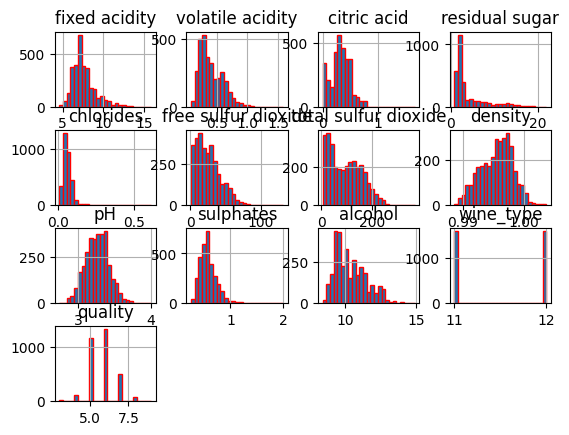

In [14]:
#Pandas.DataFrame.hist() function is useful in understanding the distribution of numeric variables
df.hist(edgecolor='red',bins=25)

In [15]:
new_df = df.copy()

In [16]:
for column in new_df.columns:
    skewness = new_df[column].skew()
    print(f"Skewness of {column}: {skewness}")

Skewness of fixed acidity: 1.4339268124764888
Skewness of volatile acidity: 0.9498789352338776
Skewness of citric acid: 0.23617242220907755
Skewness of residual sugar: 1.7617620549456439
Skewness of chlorides: 5.05052125743627
Skewness of free sulfur dioxide: 0.9142641523637972
Skewness of total sulfur dioxide: 0.410639298381376
Skewness of density: -0.1793980920724598
Skewness of pH: 0.2262751908924951
Skewness of sulphates: 1.7942624736406945
Skewness of alcohol: 0.7417201646138065
Skewness of wine_type: 0.0
Skewness of quality: 0.22858163993272515


In [17]:
rwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,12.0,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.0,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,12.0,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,12.0,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,12.0,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,12.0,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,12.0,8.000000


In [18]:
wwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000,1599.0,1599.000000
mean,7.016948,0.280210,0.363615,6.047029,0.046440,34.895560,143.744528,0.994389,3.20666,0.487455,10.285241,11.0,5.874922
std,0.879253,0.103262,0.139089,4.995919,0.023196,16.427488,44.196631,0.002684,0.15662,0.115761,1.123966,0.0,0.935660
min,4.800000,0.080000,0.000000,0.800000,0.017000,3.000000,19.000000,0.988600,2.74000,0.250000,8.500000,11.0,3.000000
25%,6.400000,0.210000,0.280000,1.600000,0.037000,23.000000,113.000000,0.992350,3.09000,0.400000,9.400000,11.0,5.000000
50%,7.000000,0.260000,0.350000,4.700000,0.044000,34.000000,143.000000,0.994000,3.19000,0.470000,10.100000,11.0,6.000000
75%,7.500000,0.320000,0.430000,9.400000,0.050000,46.000000,172.000000,0.996500,3.31000,0.550000,11.000000,11.0,6.000000
max,14.200000,0.905000,1.660000,22.000000,0.346000,131.000000,366.500000,1.001200,3.82000,0.970000,14.000000,11.0,9.000000


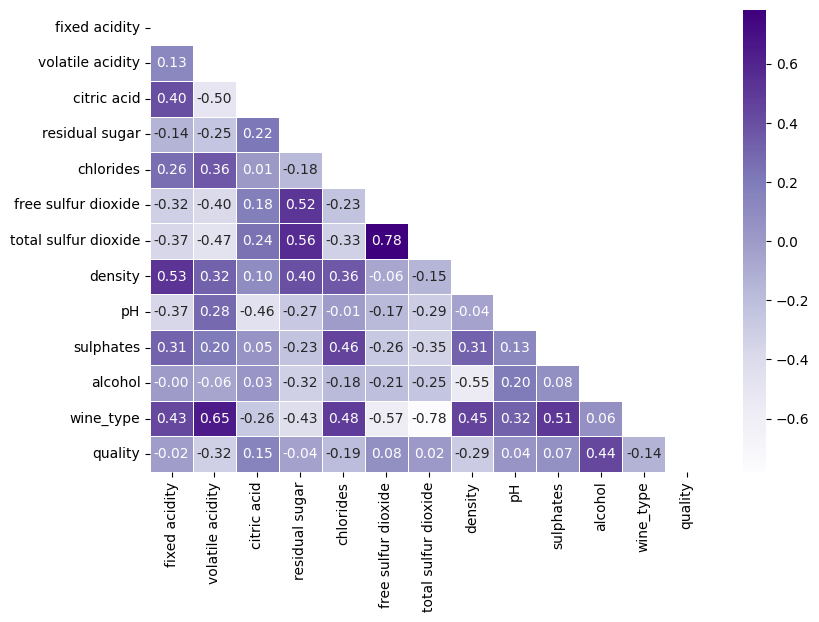

In [19]:
###CORRELATION with quality it is usually presented in heatmap
corr = new_df.corr()
# cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr))
plt.show()

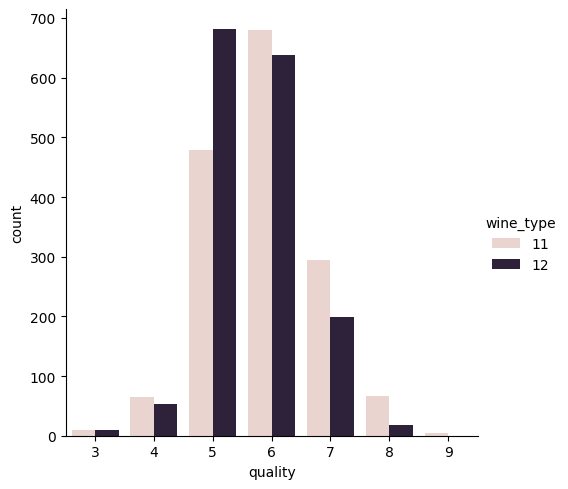

In [20]:
#Quality check
sns.catplot(x='quality',data=new_df,kind='count',hue='wine_type')

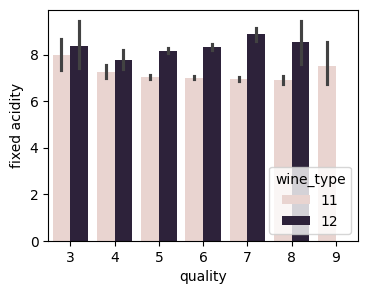

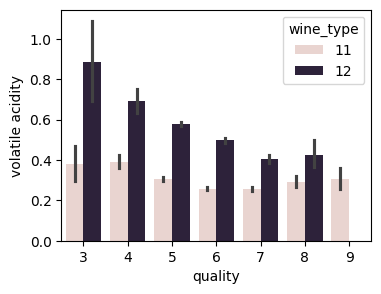

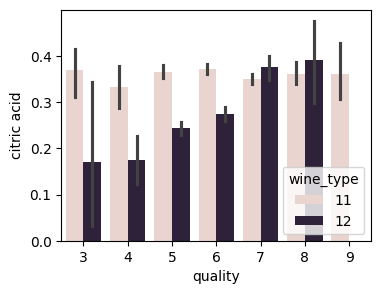

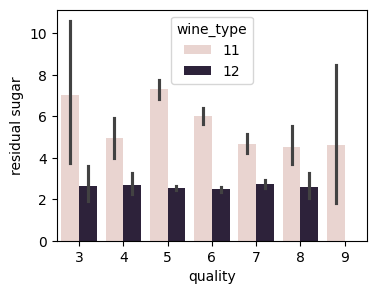

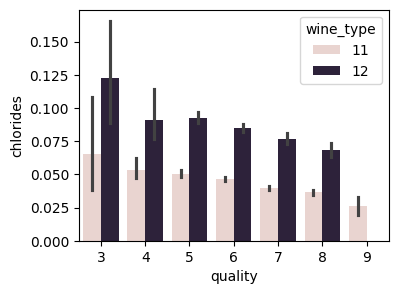

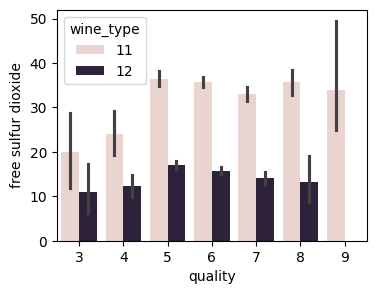

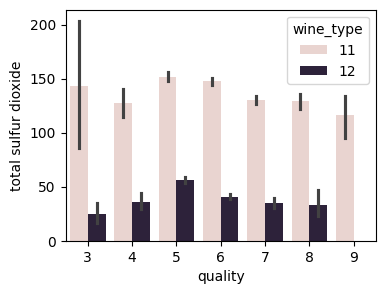

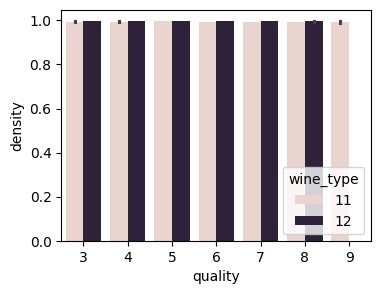

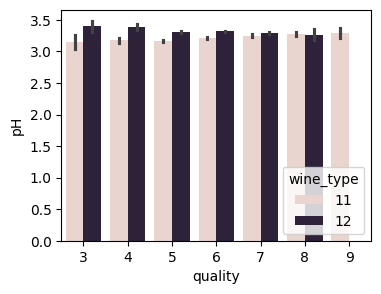

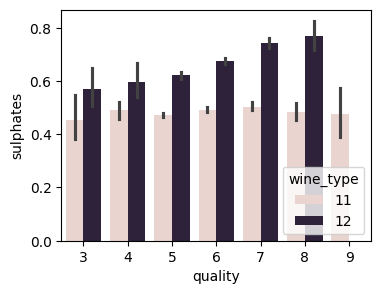

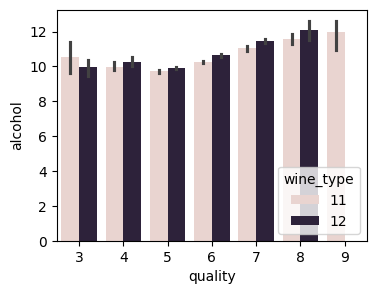

In [21]:
#comparison of columns with quality
arr = np.array(["fixed acidity","volatile acidity","citric acid","residual sugar",
                "chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"])
for i in arr:
    plot=plt.figure(figsize=(4,3))
    sns.barplot(x="quality",y=i,data=new_df,hue='wine_type')


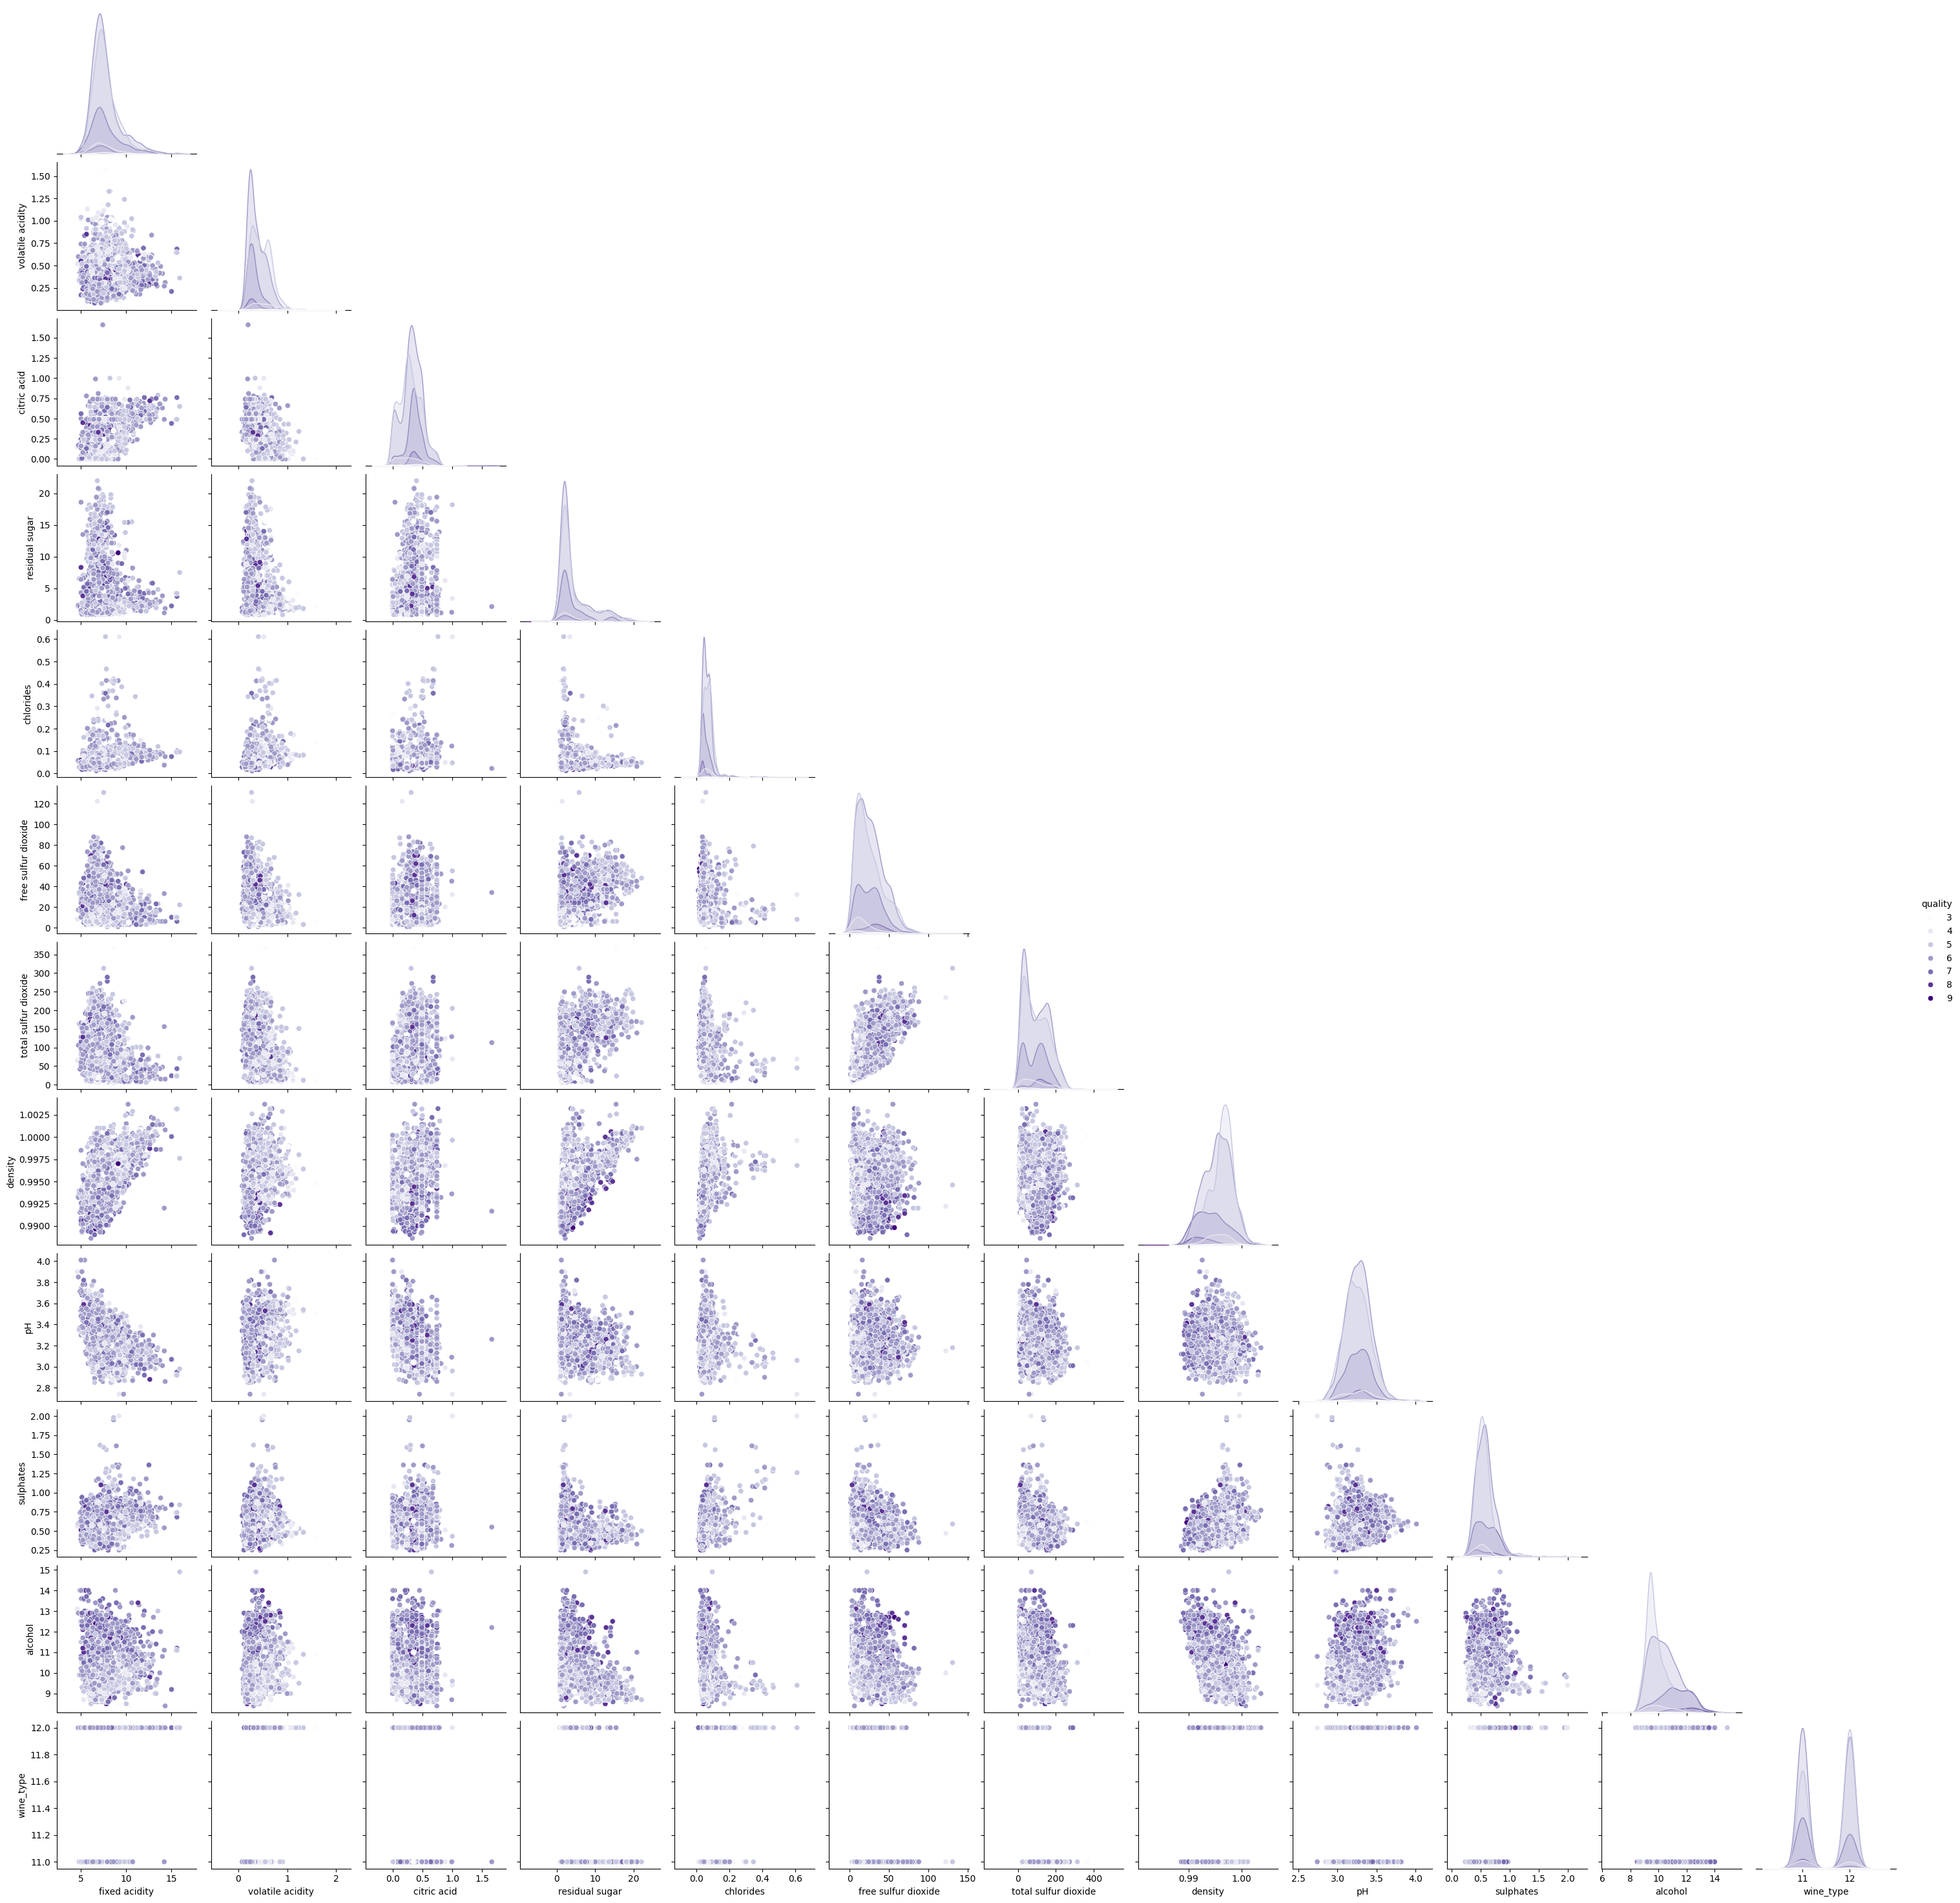

In [22]:
sns.pairplot(new_df, hue='quality', corner = True, palette='Purples')

In [23]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [25]:
# If wine quality is 7 or above then will consider as good quality wine
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality,goodquality
287,7.2,0.230,0.39,14.2,0.058,49.0,192.0,0.99790,2.98,0.48,9.00,11,7,1
71,7.7,0.670,0.23,2.1,0.088,17.0,96.0,0.99620,3.32,0.48,9.50,12,5,0
1396,8.7,0.675,0.10,1.6,0.090,4.0,11.0,0.99745,3.31,0.65,9.55,12,5,0
1448,7.4,0.160,0.49,1.2,0.055,18.0,150.0,0.99170,3.23,0.47,11.20,11,6,0
1543,7.3,0.140,0.49,1.1,0.038,28.0,99.0,0.99280,3.20,0.72,10.60,11,6,0


In [27]:
# See total number of good vs bad wines samples
df['goodquality'].value_counts()

0    2616
1     582
Name: goodquality, dtype: int64

In [93]:
# Separate depedent and indepedent variables
X =df.drop(['quality','goodquality','wine_type'], axis = 1)
y =df['wine_type']
z =df['goodquality']


(3198, 11)

In [98]:
#Train_test_Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [99]:
z_train,z_test = train_test_split(z,test_size=0.25,random_state=42)

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building models for Quality of wines

## Random forest

In [102]:

Rfc = RandomForestClassifier()
params = {'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']}
from sklearn.model_selection import RandomizedSearchCV
CV1 = RandomizedSearchCV(Rfc,param_distributions=params,cv=10,verbose=3)
CV1.fit(X_train,z_train)

print('Tuned hyper parameters : ', CV1.best_params_)
print('accuracy : ', CV1.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END criterion=log_loss, max_features=sqrt, n_estimators=150;, score=0.879 total time=   0.8s
[CV 2/10] END criterion=log_loss, max_features=sqrt, n_estimators=150;, score=0.908 total time=   0.8s
[CV 3/10] END criterion=log_loss, max_features=sqrt, n_estimators=150;, score=0.896 total time=   0.8s
[CV 4/10] END criterion=log_loss, max_features=sqrt, n_estimators=150;, score=0.904 total time=   0.8s
[CV 5/10] END criterion=log_loss, max_features=sqrt, n_estimators=150;, score=0.879 total time=   0.8s
[CV 6/10] END criterion=log_loss, max_features=sqrt, n_estimators=150;, score=0.904 total time=   0.8s
[CV 7/10] END criterion=log_loss, max_features=sqrt, n_estimators=150;, score=0.875 total time=   0.8s
[CV 8/10] END criterion=log_loss, max_features=sqrt, n_estimators=150;, score=0.871 total time=   0.8s
[CV 9/10] END criterion=log_loss, max_features=sqrt, n_estimators=150;, score=0.912 total time=   1.1s
[CV 10/10]

In [103]:
Rfc = RandomForestClassifier(**CV1.best_params_)
Rfc.fit(X_train,z_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [104]:
#model evaluation to predicct  wine quality for train data
X_train_prediction=Rfc.predict(X_train)
train_acc=accuracy_score(X_train_prediction,z_train)
print(train_acc)

1.0


In [105]:
#accuracy on  quality  test data
predictionR=Rfc.predict(X_test)
accuracy_quality=accuracy_score(predictionR,z_test)
accuracy_quality

0.8825

## Gaussian Naive Bayes (Quality)

In [106]:
from sklearn.naive_bayes import GaussianNB
Nb = GaussianNB()
Nb.fit(X_train,z_train)

GaussianNB()

In [107]:
#model evaluation to predicct  wine quality Gausian (train and test data)
X_trainprediction=Nb.predict(X_train)
train_acc=accuracy_score(X_trainprediction,z_train)
print(train_acc)

0.8040033361134279


In [108]:
predictionG=Nb.predict(X_test)
accuracy_qualityy=accuracy_score(predictionG,z_test)
accuracy_qualityy

0.7875

## SVC

In [109]:
from sklearn.svm import SVC
svc = SVC()
params3 = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}
from sklearn.model_selection import GridSearchCV
CV3 = GridSearchCV(svc,param_grid=params3,cv=10)
CV3.fit(X_train,z_train)

print('Tuned hyper parameters : ', CV3.best_params_)
print('accuracy : ', CV3.best_score_)

Tuned hyper parameters :  {'C': 10, 'gamma': 100}
accuracy :  0.8765672942817295


In [110]:
#Training model with best parameters
svc = SVC(**CV3.best_params_)
svc.fit(X_train,y_train)

SVC(C=10, gamma=100)

In [111]:
#accuracy on  wine_type  test data
prediction_svc=svc.predict(X_test)
accuracy_svc=accuracy_score(prediction_svc,y_test)
accuracy_svc

0.9475

In [112]:
print(classification_report(prediction_svc,y_test))

              precision    recall  f1-score   support

          11       1.00      0.90      0.95       422
          12       0.90      1.00      0.95       378

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



In [113]:
cm = confusion_matrix(y_test,prediction_svc)
cm

array([[381,   1],
       [ 41, 377]])

## Logistic Regression

In [114]:
params2 = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty':['l1','l2','elasticnet'],
    'max_iter':[100,200,300,400,500]
}
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
CV2 = GridSearchCV(lr,param_grid=params2,cv=10)
CV2.fit(X_train,z_train)

print('Tuned hyper parameters : ', CV2.best_params_)
print('accuracy : ', CV2.best_score_)

Tuned hyper parameters :  {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy :  0.8206834030683403


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3500 fits failed out of a total of 6300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

In [115]:
print('Tuned hyper parameters : ', CV2.best_params_)
print('accuracy : ', CV2.best_score_)

Tuned hyper parameters :  {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy :  0.8206834030683403


In [116]:
#Training model with best parameters
lr = LogisticRegression(**CV2.best_params_)
lr.fit(X_train,z_train)

LogisticRegression(C=0.001, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [117]:
#model evaluation to predicct wine type for Train data
X_train_predict=lr.predict(X_train)
train_accur=accuracy_score(X_train_predict,z_train)
print(train_accur)

0.8206839032527106


In [118]:
#accuracy on  wine_type  test data
prediction=lr.predict(X_test)
accuracy=accuracy_score(prediction,z_test)
accuracy

0.81

# Building models for type of wines

## Logistic regression for wine type classification

In [119]:
params3 = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty':['l1','l2','elasticnet'],
    'max_iter':[100,200,300,400,500]
}
from sklearn.model_selection import GridSearchCV
lr1 = LogisticRegression()
CV3 = GridSearchCV(lr,param_grid=params3,cv=10)
CV3.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=0.001, class_weight='balanced',
                                          penalty='l1', solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
                         'class_weight': ['balanced'],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [120]:
print('Tuned hyper parameters : ', CV3.best_params_)
print('accuracy : ', CV3.best_score_)

Tuned hyper parameters :  {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy :  0.9916614365411437


In [121]:
#Training model with best parameters
lr1 = LogisticRegression(**CV3.best_params_)
lr1.fit(X_train,y_train)

LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [122]:
#model evaluation to predicct wine type for Train data
X_train_predict_type=lr1.predict(X_train)
train_accur_type=accuracy_score(X_train_predict_type,y_train)
print(train_accur_type)

0.9920767306088407


In [123]:
#accuracy on  wine_type  test data
X_test_predict_type=lr1.predict(X_test)
test_accuracy_type=accuracy_score(X_test_predict_type,y_test)
test_accuracy_type

0.99

In [124]:
print(classification_report(X_test_predict_type,y_test))

              precision    recall  f1-score   support

          11       0.99      0.99      0.99       384
          12       0.99      0.99      0.99       416

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



In [125]:
cm = confusion_matrix(y_test,X_test_predict_type)
cm

array([[379,   3],
       [  5, 413]])

# All models Accuracy (Wine Quality)

In [126]:
print('accuracy for quality model \n 1]using random forest',accuracy_quality,
     '\n 2]using Gaussian Naive Byes',accuracy_qualityy,
      '\n 3]Using Support Vectore Classifier',accuracy_svc,
     '\n 4] using Logistic regression',accuracy)

accuracy for quality model 
 1]using random forest 0.8825 
 2]using Gaussian Naive Byes 0.7875 
 3]Using Support Vectore Classifier 0.9475 
 4] using Logistic regression 0.81


# TRAINING data using ensemble learning (for Quality)

In [127]:
#defining a function for evaluation of data using multiple models

In [128]:
def evaluate_models(models, X_train, X_test, z_train, z_test):
    scores = list()
    for name, model in models:
        model.fit(X_train, z_train)
        yhat = model.predict(X_test)
        acc = accuracy_score(z_test, yhat)
        scores.append(acc)
    return scores

In [129]:
from sklearn.ensemble import VotingClassifier

In [130]:
#Putting multiple models used in this project under 1 list
models = list()
models.append(('bayes', GaussianNB()))
models.append(('random',RandomForestClassifier()))

In [131]:
#MODEL ACCURACY CALCULATION ON TRAIN DATA
scores = evaluate_models(models, X_train, X_test, z_train, z_test)
print(scores)

[0.7875, 0.8825]


In [132]:
#MODEL ACCURACY CALCULATION ON TEST DATA
ensemble = VotingClassifier(estimators=models, voting='soft')
# fit the ensemble on the training dataset
ensemble.fit(X_train,z_train)
# make predictions on test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = accuracy_score(yhat,z_test)
print(' Accuracy: ',score)

 Accuracy:  0.83375


# TESTING DATA & MODEL EVALUATION

In [140]:
input_data=( 0.70,0.00,0.076,0.9978,3.51,0.56,9.4,0.247788,0.051887,0.076923,0.077670)
input_data_array=np.asarray(input_data)
in_data=input_data_array.reshape(1,-1)
prediction=lr1.predict(in_data)

prediction1=svc.predict(in_data)


In [141]:
if(prediction==12):
    print("Red Wine")
    print("Quality is",prediction1)
else:
    print("White wine")
    print("Quality is",prediction1)

White wine
Quality is [11]


# Ploting models accuracy for predicting Quality of wine

In [143]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier','GaussianNB','SVC','LogisticRegression'],
    'Score' : [accuracy_quality, accuracy_qualityy,accuracy_svc, accuracy]})

result.sort_values(by='Score', inplace=True)

<ipython-input-144-fc4bdfd18b39>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=result.Algorithm, rotation=290)


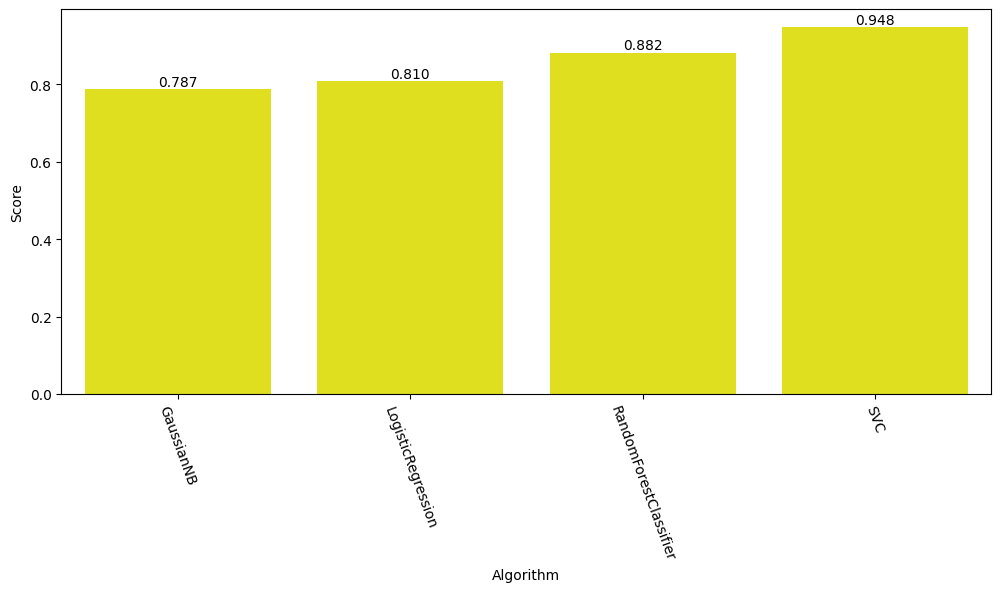

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

sns.barplot(x='Algorithm', y='Score', data=result,color='yellow')
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=290)
plt.show()

# **CONCLUSION**

**Acording to the above plots, best algorithm baseD on Score is :
 Support Vector Classifier**